# Classification using K-Nearest Neighbours using Sckikit-Learn

## Importing the required packages

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Downloading and reading the dataset into a Panda's Dataframe from Drive

In [3]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Path to your file (adjust if stored elsewhere)
path = "/content/drive/My Drive/datasets/Flight_Price_Dataset_of_Bangladesh.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load dataset
df = pd.read_csv(path)

# Preview
print(df.shape)
df.head()

(57000, 17)


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [49]:
# Fix the warning by making an explicit copy
X = df[['Source', 'Destination', 'Duration (hrs)', 'Total Fare (BDT)']].copy()  # Add .copy() here
y = df['Total Fare (BDT)']  # If you want Total Fare as target

print("Original X shape:", X.shape)
print("Original X columns:", X.columns.tolist())
print("\nOriginal X sample:")
print(X.head())

# 4. Encode categorical features
le_source = preprocessing.LabelEncoder()
X.loc[:, 'Source'] = le_source.fit_transform(X['Source'])  # Use .loc to avoid the warning

le_dest = preprocessing.LabelEncoder()
X.loc[:, 'Destination'] = le_dest.fit_transform(X['Destination'])  # Use .loc to avoid the warning

print("\nAfter encoding:")
print("Encoded X sample:")
print(X.head())

print("\nSource categories:", le_source.classes_)
print("Destination categories:", le_dest.classes_)

Original X shape: (57000, 4)
Original X columns: ['Source', 'Destination', 'Duration (hrs)', 'Total Fare (BDT)']

Original X sample:
  Source Destination  Duration (hrs)  Total Fare (BDT)
0    CXB         CCU        1.219526      26300.908775
1    BZL         CGP        0.608638      11805.395471
2    ZYL         KUL        2.689651      51864.874251
3    RJH         DAC        0.686054       4635.607340
4    SPD         YYZ       14.055609      74130.377068

After encoding:
Encoded X sample:
  Source Destination  Duration (hrs)  Total Fare (BDT)
0      2           2        1.219526      26300.908775
1      0           3        0.608638      11805.395471
2      7          13        2.689651      51864.874251
3      5           5        0.686054       4635.607340
4      6          18       14.055609      74130.377068

Source categories: ['BZL' 'CGP' 'CXB' 'DAC' 'JSR' 'RJH' 'SPD' 'ZYL']
Destination categories: ['BKK' 'BZL' 'CCU' 'CGP' 'CXB' 'DAC' 'DEL' 'DOH' 'DXB' 'IST' 'JED' 'JFK'
 'JSR

In [50]:
y = y.values
print(y[:5])

[26300.90877462 11805.39547057 51864.87425106  4635.6073403
 74130.37706775]


## Normalizing the data


Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [51]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X.astype(float))

# Preview first 5 rows
X[0:5]


array([[-0.6530331 , -1.31098614, -0.67792479, -0.54702504],
       [-1.52538659, -1.13633343, -0.8271401 , -0.72430011],
       [ 1.5278506 ,  0.61019367, -0.31883302, -0.23438667],
       [ 0.65549712, -0.78702801, -0.80823059, -0.81198412],
       [ 1.09167386,  1.48345723,  2.45741034,  0.03791266]])

## Train and Test Data split

In [52]:
from sklearn.model_selection import train_test_split

# y is already a NumPy array, no .values needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (45600, 4) (45600,)
Test set: (11400, 4) (11400,)


## Importing KNN library

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn import metrics

## Training the Machine Learning models for different K's

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np



Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)

    # Regression evaluation
    mean_acc[n-1] = metrics.r2_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat - y_test) / np.sqrt(yhat.shape[0])

mean_acc





array([0.99913048, 0.99908206, 0.99909879, 0.998981  , 0.9989521 ,
       0.99889279, 0.9988167 , 0.9987415 , 0.99865732])

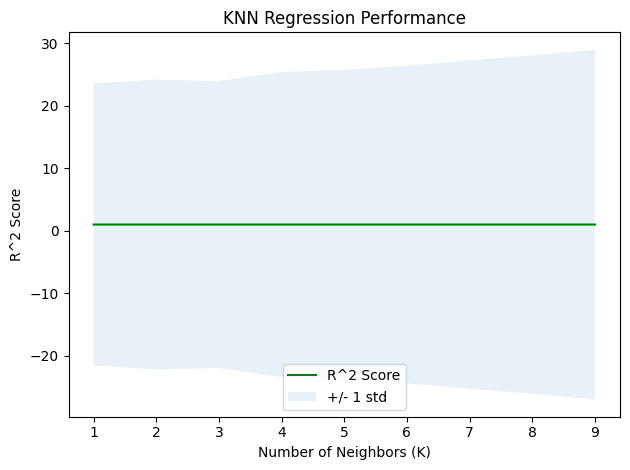

In [56]:
import matplotlib.pyplot as plt

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.1)
plt.legend(('R^2 Score', '+/- 1 std'))
plt.ylabel('R^2 Score')
plt.xlabel('Number of Neighbors (K)')
plt.title('KNN Regression Performance')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9991304798972042 with k= 1
